In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [44]:
def clahe_rgb(img, clip_lim = 2.0, tile_size = (8,8)):
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    
    clahe = cv2.createCLAHE(clipLimit = clip_lim, tileGridSize=tile_size)
    
    c_r = clahe.apply(r)
    c_g = clahe.apply(g)
    c_b = clahe.apply(b)
    
    new_img = img.copy()
    
    new_img[:,:,0] = c_r
    new_img[:,:,1] = c_g
    new_img[:,:,2] = c_b
    
    return new_img
    

### Step 1: Display the Original Image

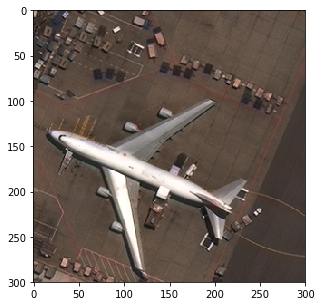

In [80]:
test_img = 'train_images/1095.tif'
plt.figure(figsize = (5,5))
img = plt.imread(test_img)[1600:1900, 500:800]
plt.imshow(img)

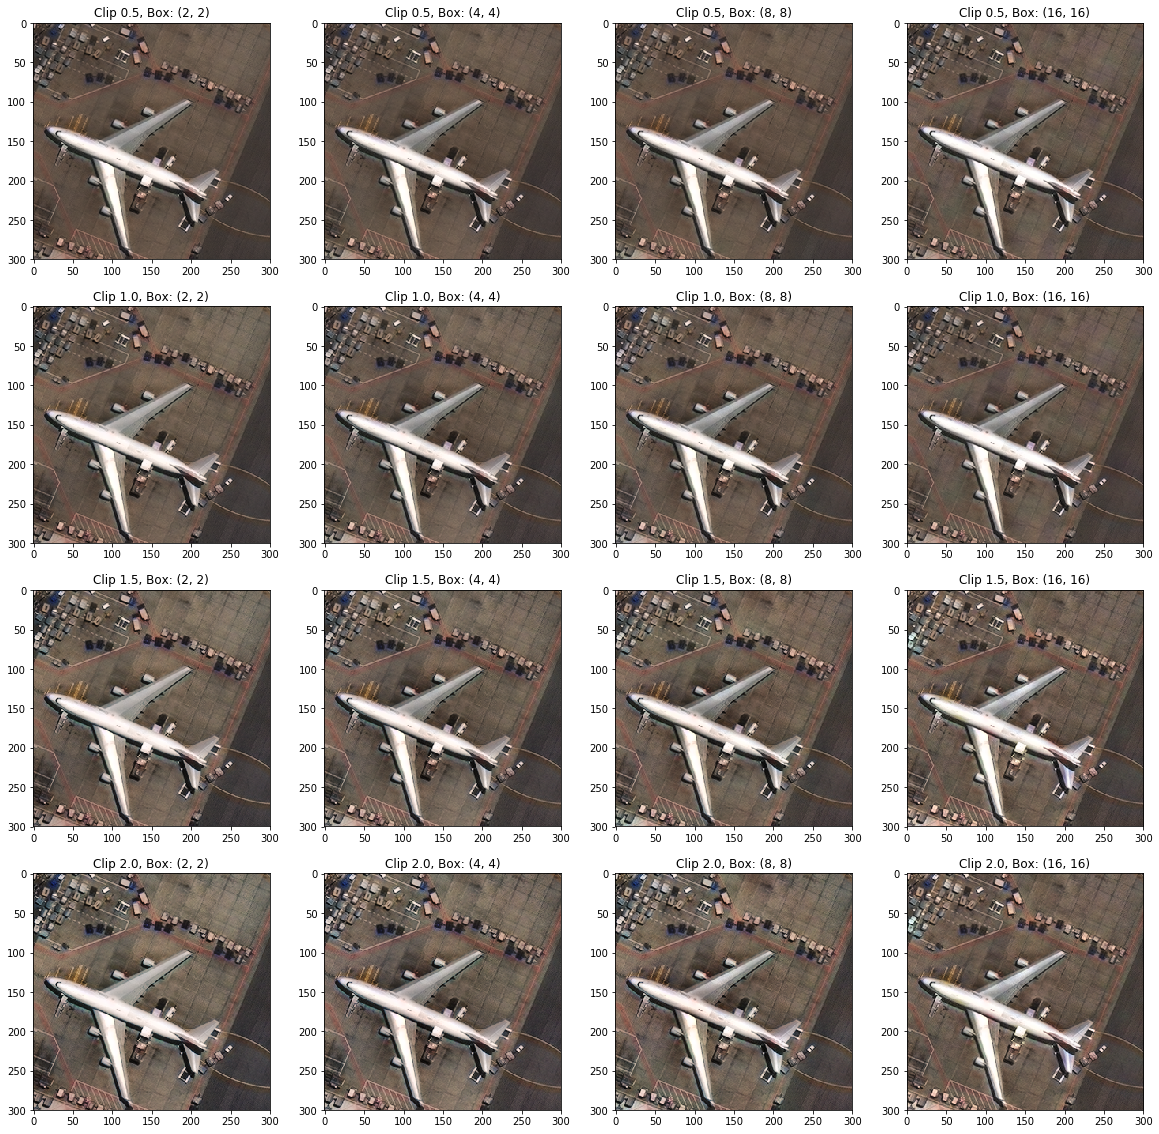

In [93]:
clip = [0.5, 1.0, 1.5, 2.0]
box = [(2,2), (4,4), (8,8), (16,16)]

num_c = len(clip)
num_b = len(box)

fig, ax = plt.subplots(num_c, num_b, figsize = (5*num_l,5*num_c))

c_ind = 0
b_ind = 0

for c in clip:
    for b in box:
        c_img = clahe_rgb(img, c, b)
        ax[c_ind,b_ind].title.set_text('Clip {}, Box: {}'.format(c,b))
        ax[c_ind,b_ind].imshow(c_img)
        b_ind += 1
    b_ind = 0
    c_ind += 1
